In [1]:
%pylab inline  
import numpy as np  
import matplotlib.pyplot as plt
from PIL import Image 
import os   
from  SurfaceAnalizer import PinHoleAnalizer 


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Parameters (7-QS)
# screen size in pixels:
W=606 
H=600
#pixel size 
mkinpx = 0.44
# Sphere radius in micron and center in pixels
R= 1500.0  #3280
x0 = (W/2+50) 
y0 = (H/2+50) 
# max brightness and background(gray values)
I0 = 128
Ibkg = 50
# light source
fi0 = 0.0
lm0 = 0.530  # lanbda microns
bw = 0.015 # bandwidth, microns
c = 299792458.0 * 10**9  # micron/s (* 10^12 for nanometers)
dnu = c *bw / (lm0 * lm0) 
Lc = c / ( np.pi * dnu) 
# Lc = (bw / np.pi ) 
print     dnu, Lc 

# dz = 0.900  #microns
# reflevtivity
rfl = 0.95

1.60088532218e+16 5.96088313527


In [3]:
# Simulate sphere Image (parallel light I0) and scattered image (uniform random reflection angle)
npI = np.ones( (W,H), dtype =np.int8 ) *Ibkg
npIScatter = npI.copy()
print npI.shape
R2 = R*R; x0 
for x in range(W):
    for y in range (H) : 
        D2 = ((x-x0)*(x-x0)+(y-y0)*(y-y0)) *( mkinpx* mkinpx)
        if D2 <= R2:
            npI[x, y] =I0* np.sqrt(1- D2/R2)
#             psi = np.random.uniform(-np.pi, np.pi)
            psi = np.random.normal(0, np.pi/6)
            npIScatter[x, y] =  np.sqrt(1- D2/R2)* np.cos(psi) *I0
Img = Image.fromarray(npI)
ImgScatter = Image.fromarray(npIScatter)

(606, 600)


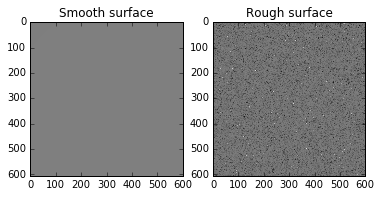

In [4]:
# show image
fig = plt.figure()
a=fig.add_subplot(1,2,1)
a.set_title('Smooth surface')
plt.imshow(Img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
# plt.show() 
a=fig.add_subplot(1,2,2)
a.set_title('Rough surface')
plt.imshow(ImgScatter, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
plt.show()

-

shift =  0


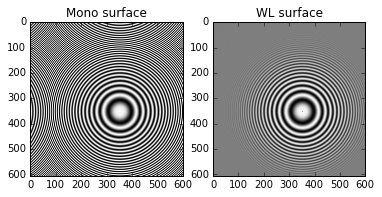

In [7]:
# Simulate sphere Image monochrome and wl interference
def createImages(shift = 0): 
    print "shift = ", shift 
    npI = np.ones( (W,H), dtype =np.int8 ) *Ibkg
    npInt = np.ones( (W,H), dtype =np.int8 ) *Ibkg 
    npIntWL = npInt.copy() 
    R2 = R*R;  
    for x in range(W):
        for y in range (H) : 
            D2 = ((x-x0)*(x-x0)+(y-y0)*(y-y0))*( mkinpx* mkinpx)
            if D2 <= R2: 
                dZ = shift +( R - np.sqrt( R2 - D2) )
                q2 = (dZ / Lc) * (dZ / Lc) 
                npI[x, y] =I0 * np.sqrt(1- D2/R2)
#                 npInt[x, y] = npI[x, y]  #* (1.0+    rfl* np.exp(-4.0 * q2)  * np.cos(4.0* np.pi * dZ/lm0 - fi0))
                npInt[x, y] =npI[x, y] * (1+  rfl* np.cos(4.0 * np.pi * dZ/lm0 - fi0) )
                npIntWL[x, y] =   npI[x, y]  * (1+ rfl * np.exp(-4 * q2) * np.cos(4.0 * np.pi * dZ/lm0 - fi0) )
 
    ImgI = Image.fromarray(npInt)
    ImgWLI = Image.fromarray(npIntWL)
    return ImgI, ImgWLI
showImages(0)

In [6]:

%matplotlib inline
from IPython.html.widgets import interact
def showImages(shift):
    ImgI, ImgScatterI = createImages(shift)
    # show image 
    # TODO - add slider
    fig = plt.figure()
    a=fig.add_subplot(1,2,1)
    a.set_title('Mono surface')
    plt.imshow(ImgI, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
    # plt.show() 
    a=fig.add_subplot(1,2,2)
    a.set_title('WL surface')
    plt.imshow(ImgScatterI, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255) 
    plt.show()
interact(showImages, shift=(-10.0,10.0, .1), __manual=True)

C:\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<function __main__.showImages>